# Safety Helmet Detection - Exploratory Data Analysis

**Objective**: Analyze the dataset to understand class distribution, image quality, and characteristics.

**Dataset**: 631 images (200x200x3) with binary labels (0=Without Helmet, 1=With Helmet)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

# Get the project root directory
# Works in both Jupyter notebooks and Python scripts
try:
    # For Python scripts
    script_dir = Path(__file__).parent
    project_root = script_dir.parent
except NameError:
    # For Jupyter notebooks
    script_dir = Path.cwd()
    # If running from notebooks directory, go up one level
    project_root = script_dir.parent if script_dir.name == 'notebooks' else script_dir

%matplotlib inline

## 1. Load Dataset

In [5]:
# Load data
print("Loading dataset...")
images = np.load(project_root / 'data/raw/images_proj.npy')
labels_df = pd.read_csv(project_root / 'data/raw/Labels_proj.csv')
labels = labels_df['Label'].values

print(f"Images shape: {images.shape}")
print(f"Labels shape: {labels.shape}")

Loading dataset...
Images shape: (631, 200, 200, 3)
Labels shape: (631,)


## 2. Class Distribution Analysis

In [6]:
# Class distribution
class_counts = pd.Series(labels).value_counts().sort_index()
class_names = {0: 'Without Helmet', 1: 'With Helmet'}

print("Class Distribution:")
for label, count in class_counts.items():
    percentage = (count / len(labels)) * 100
    print(f"{class_names[label]}: {count} images ({percentage:.2f}%)")

Class Distribution:
Without Helmet: 320 images (50.71%)
With Helmet: 311 images (49.29%)


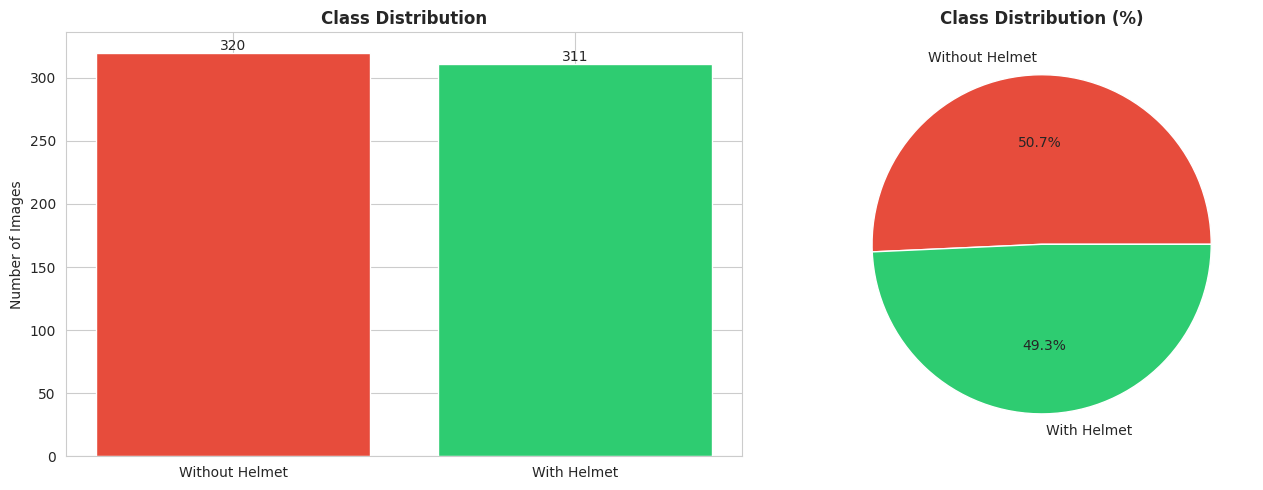

In [7]:
# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
ax1 = axes[0]
bars = ax1.bar([class_names[i] for i in class_counts.index], 
               class_counts.values, 
               color=['#e74c3c', '#2ecc71'])
ax1.set_ylabel('Number of Images')
ax1.set_title('Class Distribution', fontweight='bold')

for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom')

ax2 = axes[1]
ax2.pie(class_counts.values, 
        labels=[class_names[i] for i in class_counts.index],
        autopct='%1.1f%%',
        colors=['#e74c3c', '#2ecc71'])
ax2.set_title('Class Distribution (%)', fontweight='bold')

plt.tight_layout()
plt.savefig(project_root / 'outputs/class_distribution.png', dpi=300)
plt.show()

## 3. Sample Image Visualization

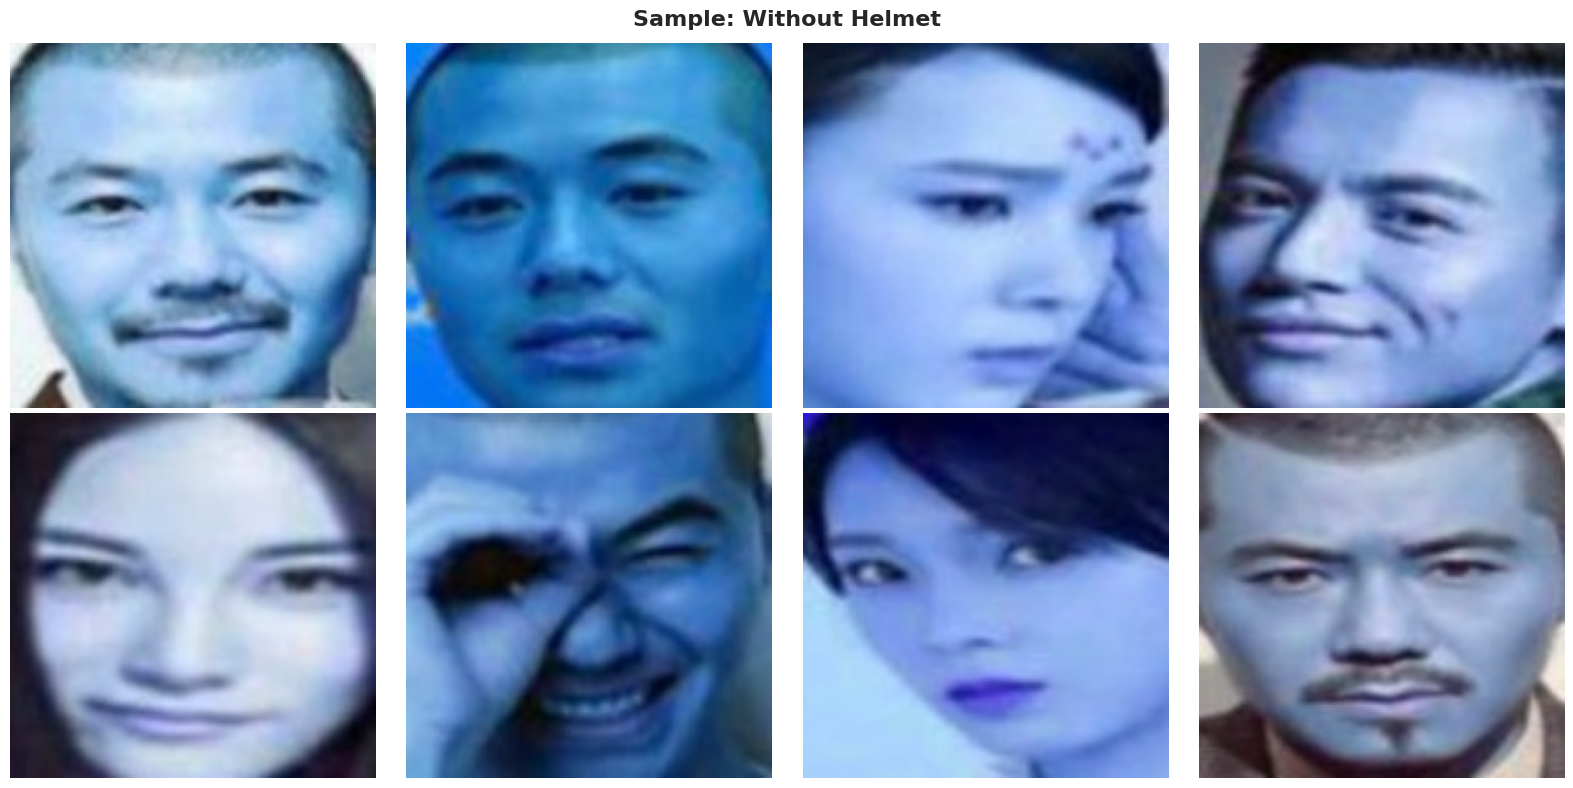

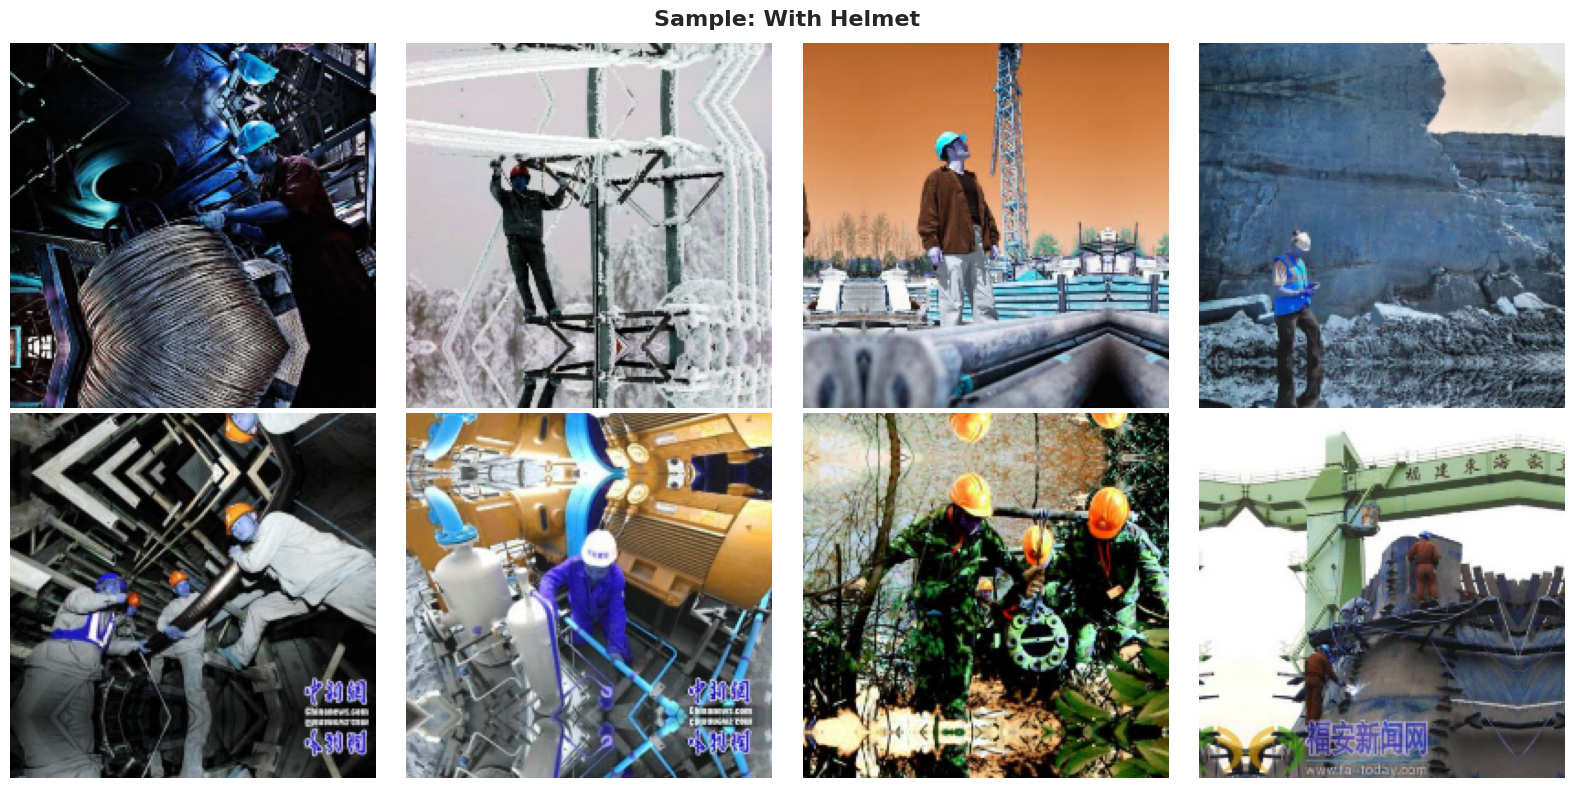


EDA Complete! Check outputs/ folder for visualizations.


In [8]:
# Sample images
def show_samples(images, labels, class_label, class_name):
    indices = np.where(labels == class_label)[0]
    sample_indices = np.random.choice(indices, size=8, replace=False)
    
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    fig.suptitle(f'Sample: {class_name}', fontsize=16, fontweight='bold')
    
    for idx, ax in enumerate(axes.flat):
        img = images[sample_indices[idx]]
        ax.imshow(img.astype('uint8'))
        ax.axis('off')
    
    plt.tight_layout()
    plt.savefig(project_root / f'outputs/samples_{class_name.lower().replace(" ", "_")}.png', dpi=300)
    plt.show()

np.random.seed(42)
show_samples(images, labels, 0, 'Without Helmet')
show_samples(images, labels, 1, 'With Helmet')

print("\nEDA Complete! Check outputs/ folder for visualizations.")